# Part 0: Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod, CarliniLInfMethod, CarliniL2Method , ProjectedGradientDescentTensorFlowV2, AutoProjectedGradientDescent,ProjectedGradientDescent

print(tf.__version__)

2.20.0


# Part 1 : Building a Model

In [3]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# category_loss_from_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

import numpy as np
import tensorflow as tf

# Load dataset directly from your local file
with np.load('mnist.npz') as data:
    x_train, y_train = data['x_train'], data['y_train']
    x_test, y_test = data['x_test'], data['y_test']

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Loss function
category_loss_from_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='linear')
])

model.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

In [5]:
model.fit(x_train, y_train, epochs=5);

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9139 - loss: 0.3004
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9562 - loss: 0.1468
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9671 - loss: 0.1104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0893
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0765


In [6]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9756 - loss: 0.0792
Accuracy on test data: 97.56%


In [7]:
#1/ Train for 5 epochs a model called "model1" that has only one hidden layer of 64 neurons and only *linear* activations instead of ReLU;
#compare its accuracy with the first model


model1 = tf.keras.models.Sequential([
     #fill missing code
     tf.keras.layers.InputLayer(input_shape=(28, 28)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='linear'),
     

    tf.keras.layers.Dense(10, activation='linear')
])

model1.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model1.fit(x_train,y_train, epochs=5);


loss_test, accuracy_test = model1.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.3642
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9184 - loss: 0.2926
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9218 - loss: 0.2815
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.9237 - loss: 0.2764
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9244 - loss: 0.2720
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9245 - loss: 0.2770
Accuracy on test data: 92.45%


In [8]:
#2/ Train for 5 epochs a model called "model2" that has 5 dense layer of 128 neurons and a relu activation and no dropout; compare its accuracy with the first model

model2 = tf.keras.models.Sequential([
      #fill missing code
     tf.keras.layers.InputLayer(input_shape=(28, 28)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
         tf.keras.layers.Dense(128, activation='relu'),
     

    tf.keras.layers.Dense(10, activation='linear')
])


model2.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model2.fit(x_train, y_train, epochs=5);
loss_test, accuracy_test = model2.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9238 - loss: 0.2496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1131
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9787 - loss: 0.0688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0567
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9751 - loss: 0.0876
Accuracy on test data: 97.51%


In [9]:
#2bis/ (OPTIONAL CHALLENGE /!\) Train for 5 epochs a "model3" that obtains more 99% of accuracy on *test* data (hint: you might want to use 2D convolutional layers,i.e. tf.keras.layers.Conv2D(...), and MaxPool layers, i.e.  tf.keras.layers.MaxPooling2D(...))
model3 = tf.keras.models.Sequential([
     #fill missing code
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),  
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),   
    
    tf.keras.layers.Dense(10, activation='linear')
])

model3.compile(optimizer='adam',
              loss=category_loss_from_logits,
              metrics=['accuracy']);

model3.fit(x_train, y_train, epochs=5);
loss_test, accuracy_test = model3.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9394 - loss: 0.1960
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9823 - loss: 0.0616
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9875 - loss: 0.0445
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9901 - loss: 0.0352
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9923 - loss: 0.0275
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9912 - loss: 0.0336
Accuracy on test data: 99.12%


# Part 2: Simple Whitebox Adversarial Attacks

In [10]:
classifier = KerasClassifier(model=model, clip_values=(0, 1), use_logits=True, )
x_test = x_test[0:100]
y_test = y_test[0:100]

## FGSM attacks

In [11]:
attack_fgsm = FastGradientMethod(estimator=classifier, eps=16/255, norm=np.inf)

In [12]:
x_test_adv = attack_fgsm.generate(x_test)

In [13]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5200 - loss: 1.3112 
Accuracy on adversarial test data: 52.00%
Average perturbation: 0.04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted class of original image: 7


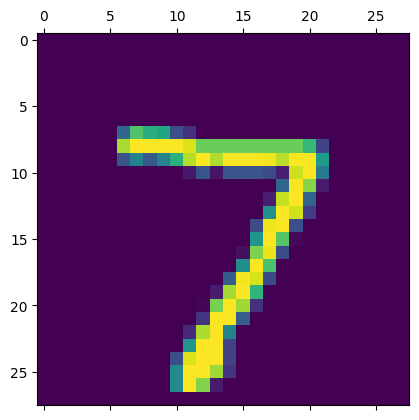

In [14]:
y_pred_0 = model.predict(x_test[0:1])
print(f"predicted class of original image: {y_pred_0.argmax()}")
plt.matshow(x_test[0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted class of adversarial attack: 3


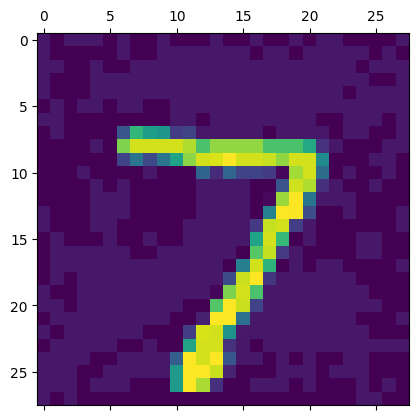

In [15]:
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.0634 
Accuracy on adversarial test data: 98.00%
Average perturbation: 0.00963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted class of adversarial attack: 7


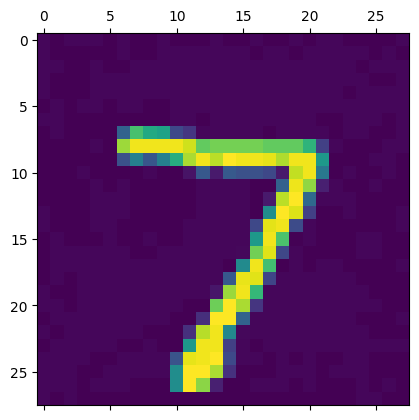

In [16]:
#3/ Run an FGSM attack on the norm Inf and 2 with EQUIVALENT epsilons, e.g. eps=4/255 for the norm Inf and eps=(16/255)*sqrt(784) for the l2 norm. Display the results. Which one leads to the best image?

attack_fgsm = FastGradientMethod(
         #fill missing code
         estimator=classifier, eps=4/255, norm=np.inf
         
)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.5f}'.format(perturbation))
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2400 - loss: 2.8521 
Accuracy on adversarial test data: 24.00%
Average perturbation: 0.02971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
predicted class of adversarial attack: 3


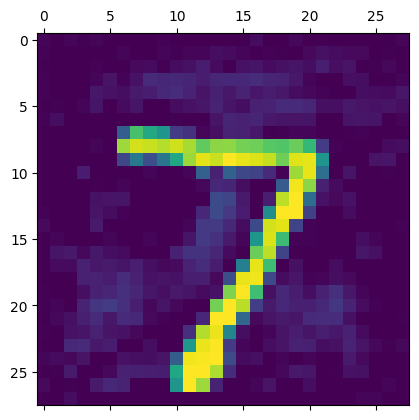

In [17]:
#3/ Run an FGSM attack on the norm Inf and 2 with EQUIVALENT epsilons, e.g. eps=16/255 for the norm Inf and eps=(16/255)*sqrt(784) for the l2 norm. Display the results. Which one leads to the best image?

attack_fgsm = FastGradientMethod(
         #fill missing code
         estimator=classifier, eps=(16/255) * sqrt(784), norm=2
)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.5f}'.format(perturbation))
y_pred_0 = model.predict(x_test_adv[0:1])
print(f"predicted class of adversarial attack: {y_pred_0.argmax()}")
plt.matshow(x_test_adv[0])
plt.show()

# Part 3: Other Adversarial Attacks (Carlini-Wagner, APGD...)

In [18]:
attack_cw = CarliniL2Method(classifier=classifier,
                              max_iter=10,
                              learning_rate=0.01,
                              initial_const=1e0,
                              )

In [19]:
x_test_adv_cw = attack_cw.generate(x_test[:10])

C&W L_2:   0%|          | 0/10 [00:00<?, ?it/s]

C&W L_2: 100%|██████████| 10/10 [03:30<00:00, 21.01s/it]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 3
L2 dist to original image 2.63


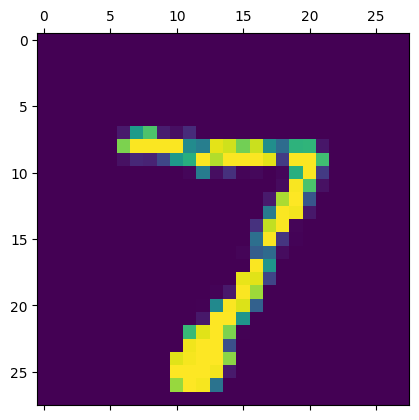

In [20]:
idx = 0
plt.matshow(x_test_adv_cw[idx])
y_pred_adv_cw = model.predict(x_test_adv_cw[idx:idx+1])
print(f"Predicted class: {y_pred_adv_cw.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv_cw[idx] - x_test[idx],):.2f}")
plt.show()

In [21]:
loss_test, accuracy_test = model.evaluate(x_test_adv_cw, y_test[:10])
perturbation = np.mean(np.abs((x_test_adv_cw - x_test[:10])))
l_2_perturbation = np.linalg.norm(x_test_adv_cw - x_test[:10],axis=(1,2),)
l_2_perturbation_mean_cw = np.mean(l_2_perturbation)
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean_cw))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.8842
Accuracy on adversarial test data: 0.00%
Average perturbation: 0.02
Average l2 perturbation: 2.50


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0600 - loss: 5.4366 
Accuracy on adversarial test data: 6.00%
Average perturbation: 0.02
Average l2 perturbation: 2.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: 3
L2 dist to original image 2.00


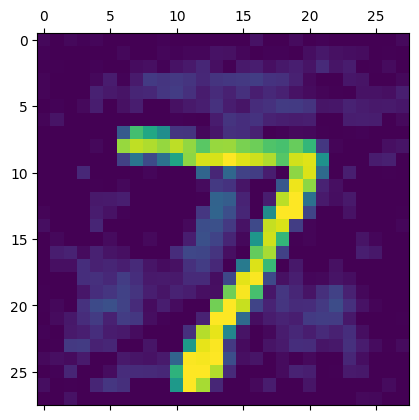

In [22]:
#4/ Generate a new FGSM attack with the same l2 perturbation as the previous CW and compare their effectiveness: i.e. %of success for similar average l2 perturbation

eps= l_2_perturbation_mean_cw
attack_fgsm = FastGradientMethod(
            #fill the missing code
            estimator=classifier, eps=eps, norm=2
)
x_test_adv = attack_fgsm.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)


l_2_perturbation = np.linalg.norm(x_test_adv - x_test,axis=(1,2))
l_2_perturbation_mean = np.mean(l_2_perturbation)


print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean))

idx = 0
plt.matshow(x_test_adv[idx])
y_pred_adv = model.predict(x_test_adv[idx:idx+1])
print(f"Predicted class: {y_pred_adv.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv[idx] - x_test[idx],):.2f}")
plt.show()

AutoPGD - restart:   0%|          | 0/1 [00:00<?, ?it/s]







































AutoPGD - restart: 100%|██████████| 1/1 [00:05<00:00,  5.47s/it]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3200 - loss: 2.2071 
2.0279542451366965
Accuracy on adversarial test data: 32.00%
Average perturbation: 0.02
Average l2 perturbation: 2.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: 3
L2 dist to original image 2.12


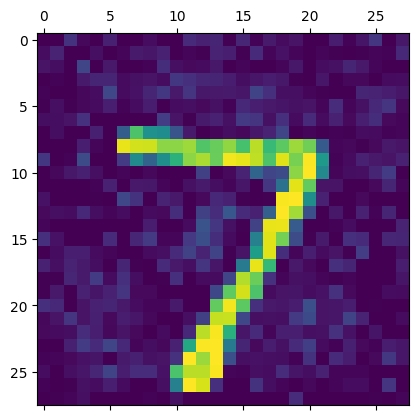

In [23]:
#5/ Generate a new APGD attack (class AutoProjectedGradientDescent) with the same (or lower) average l2 perturbation as the previous CW and FGSM, and compare their effectiveness
# to limit computation time you can set 'max_iter=10' and "nb_random_init=1", in the function arguments
eps= l_2_perturbation_mean_cw

attack_apgd = AutoProjectedGradientDescent(
            estimator=classifier, eps=eps, norm=2, max_iter=10, nb_random_init=1

)
x_test_adv_apgd = attack_apgd.generate(x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv_apgd, y_test)


l_2_perturbation = np.linalg.norm(x_test_adv_apgd - x_test,axis=(1,2))
l_2_perturbation_mean = np.mean(l_2_perturbation)
print(l_2_perturbation_mean)

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean))
idx = 0
plt.matshow(x_test_adv_apgd[idx])
y_pred_adv_apgd = model.predict(x_test_adv_apgd[idx:idx+1])
print(f"Predicted class: {y_pred_adv_apgd.argmax()}")
print(f"L2 dist to original image {np.linalg.norm(x_test_adv_apgd[idx] - x_test[idx],):.2f}")
plt.show()

PGD - Random Initializations: 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6800 - loss: 0.8466 
0.8028140583058105
Accuracy on adversarial test data: 68.00%
Average perturbation: 0.02
Average l2 perturbation: 0.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class: 7
L2 dist to original image 0.79


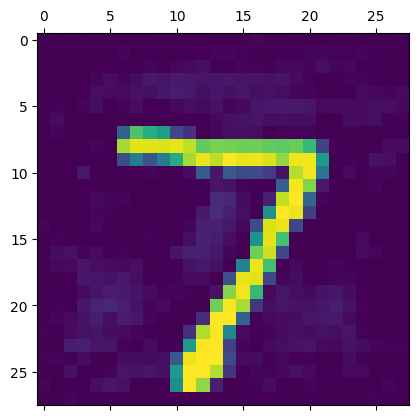

In [24]:
#5bis/ /!\ OPTIONAL CHALLENGE: find an adversarial attack in the same library (https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html)
#having better results with the SAME l2 perturbation

#eps= l_2_perturbation_mean_cw
#attack_? = ?( eps=eps, norm=2, #find a more efficient attack)

from art.attacks.evasion import MomentumIterativeMethod

eps= l_2_perturbation_mean_cw
attack_mim = MomentumIterativeMethod(estimator=classifier, eps=eps, norm=2, max_iter=10) #find a more efficient attack

x_test_adv_mim = attack_mim.generate(x=x_test)

loss_test, accuracy_test = model.evaluate(x_test_adv_mim, y_test)


l_2_perturbation = np.linalg.norm(x_test_adv_mim - x_test, axis=(1, 2))
l_2_perturbation_mean = np.mean(l_2_perturbation)
print(l_2_perturbation_mean)

print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))
print('Average l2 perturbation: {:4.2f}'.format(l_2_perturbation_mean))
idx = 0
plt.matshow(x_test_adv_mim[idx])
y_pred_adv_mim = model.predict(x_test_adv_mim[idx:idx+1])
print(f"Predicted class: {y_pred_adv_mim.argmax()}")

print(f"L2 dist to original image {np.linalg.norm(x_test_adv_mim[idx] - x_test[idx]):.2f}")
plt.show()

# Part 4: Transfer attacks

In [27]:
classifier_source = KerasClassifier(model=model2, clip_values=(0, 1))
classifier_target = KerasClassifier(model=model, clip_values=(0, 1))

attack_fgsm = FastGradientMethod(estimator=classifier_source, eps=16/255, norm=np.inf)

In [28]:
x_transfer_adv = attack_fgsm.generate(x_test)

In [29]:
perturbation = np.mean(np.abs((x_transfer_adv - x_test)))
loss_source, accuracy_source = model2.evaluate(x_transfer_adv, y_test)
loss_target, accuracy_target = model.evaluate(x_transfer_adv, y_test)

print('Average perturbation: {:4.2f}'.format(perturbation))
print('Accuracy on adversarial test data for source model: {:4.2f}%'.format(accuracy_source * 100))
print('Accuracy on adversarial test data for target model: {:4.2f}%'.format(accuracy_target * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5400 - loss: 1.8210 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8800 - loss: 0.4418 
Average perturbation: 0.04
Accuracy on adversarial test data for source model: 54.00%
Accuracy on adversarial test data for target model: 88.00%


In [30]:
#6/ Compare the transferability of the attack when using the norm 2 and eps=0.3
attack_fgsm = FastGradientMethod(estimator=classifier_source, eps=0.3, norm=2)


In [31]:
attack_fgsm = FastGradientMethod(estimator=classifier_source, eps=0.3, norm=2)

In [58]:
x_transfer_adv = attack_fgsm.generate(x_test)

In [32]:
perturbation = np.mean(np.abs((x_transfer_adv - x_test)))
loss_source, accuracy_source = model2.evaluate(x_transfer_adv, y_test)
loss_target, accuracy_target = model.evaluate(x_transfer_adv, y_test)

print('Average perturbation: {:4.2f}'.format(perturbation))
print('Accuracy on adversarial test data for source model: {:4.2f}%'.format(accuracy_source * 100))
print('Accuracy on adversarial test data for target model: {:4.2f}%'.format(accuracy_target * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5400 - loss: 1.8210 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8800 - loss: 0.4418 
Average perturbation: 0.04
Accuracy on adversarial test data for source model: 54.00%
Accuracy on adversarial test data for target model: 88.00%


# Part 5: Adversarial Attack defenses

## Adversarial training

In [33]:
from art import config
from keras.models import load_model
from art.utils import get_file, load_dataset

(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('mnist')


In [34]:
path = get_file('mnist_cnn_original.h5', extract=False, path=config.ART_DATA_PATH,
                url='https://www.dropbox.com/s/p2nyzne9chcerid/mnist_cnn_original.h5?dl=1')
classifier_model = load_model(path)
classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False)

In [35]:
classifier_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [36]:
x_test_pred = np.argmax(classifier.predict(x_test), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test, axis=1))

print("Original test data:")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(len(x_test)-nb_correct_pred))
print("Accuracy: {}".format(nb_correct_pred/len(x_test)*100))

Original test data:
Correctly classified: 9842
Incorrectly classified: 158
Accuracy: 98.42


In [37]:
attacker = FastGradientMethod(classifier, eps=0.5)
x_test_adv = attacker.generate(x_test, y_test)

In [38]:
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test, axis=1))

print("Adversarial test data:")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(len(x_test_adv)-nb_correct_adv_pred))
print("Accuracy: {}".format(nb_correct_adv_pred/len(x_test_adv)*100))

Adversarial test data:
Correctly classified: 31
Incorrectly classified: 9969
Accuracy: 0.31


In [39]:
path = get_file('mnist_cnn_robust.h5', extract=False, path=config.ART_DATA_PATH,
                url='https://www.dropbox.com/s/yutsncaniiy5uy8/mnist_cnn_robust.h5?dl=1')
robust_classifier_model = load_model(path)
robust_classifier = KerasClassifier(clip_values=(min_, max_), model=robust_classifier_model, use_logits=False)

In [40]:
robust_classifier_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,639,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,668,492 (6.36 MB)

 Trainable params: 1,668,490 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [41]:
x_test_robust_pred = np.argmax(robust_classifier.predict(x_test), axis=1)
nb_correct_robust_pred = np.sum(x_test_robust_pred == np.argmax(y_test, axis=1))

print("Original test data:")
print("Correctly classified: {}".format(nb_correct_robust_pred))
print("Incorrectly classified: {}".format(len(x_test)-nb_correct_robust_pred))
print("Accuracy: {}".format(nb_correct_robust_pred/len(x_test)*100))

Original test data:
Correctly classified: 9736
Incorrectly classified: 264
Accuracy: 97.36


In [42]:
attacker_robust = FastGradientMethod(robust_classifier, eps=0.5)
x_test_adv_robust = attacker_robust.generate(x_test, y_test)

In [43]:
x_test_adv_robust_pred = np.argmax(robust_classifier.predict(x_test_adv_robust), axis=1)
nb_correct_adv_robust_pred = np.sum(x_test_adv_robust_pred == np.argmax(y_test, axis=1))

print("Adversarial test data:")
print("Correctly classified: {}".format(nb_correct_adv_robust_pred))
print("Incorrectly classified: {}".format(len(x_test_adv_robust)-nb_correct_adv_robust_pred))
print("Accuracy: {}".format(nb_correct_adv_robust_pred/len(x_test_adv_robust)*100))

Adversarial test data:
Correctly classified: 1382
Incorrectly classified: 8618
Accuracy: 13.819999999999999


### Against stronger attacks: PGD

In [44]:
from art.attacks.evasion import ProjectedGradientDescent
attacker_pgd = ProjectedGradientDescent(estimator=classifier, eps=0.5, eps_step=0.01, max_iter=100, verbose=False)
attacker_robust_pgd = ProjectedGradientDescent(estimator=robust_classifier, eps=0.5, eps_step=0.01, max_iter=100, verbose=False)

In [46]:
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
eps_range = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
nb_correct_original = []
nb_correct_robust = []

nb_samples = 100

for eps in eps_range:
    print("Running eps {}".format(eps))
    attacker_pgd.set_params(**{'eps': eps})
    attacker_robust_pgd.set_params(**{'eps': eps})
    x_test_adv = attacker_pgd.generate(x_test[:nb_samples], y_test[:nb_samples])
    x_test_adv_robust = attacker_robust_pgd.generate(x_test[:nb_samples], y_test[:nb_samples])

    x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
    nb_correct_original += [np.sum(x_test_adv_pred == np.argmax(y_test[:nb_samples], axis=1)) / nb_samples]

    x_test_adv_robust_pred = np.argmax(robust_classifier.predict(x_test_adv_robust), axis=1)
    nb_correct_robust += [np.sum(x_test_adv_robust_pred == np.argmax(y_test[:nb_samples], axis=1)) / nb_samples]

eps_range = [0] + eps_range
nb_correct_original = [nb_correct_pred / 10000] + nb_correct_original
nb_correct_robust = [nb_correct_robust_pred / 10000] + nb_correct_robust



Running eps 0.05
Running eps 0.1
Running eps 0.2
Running eps 0.3
Running eps 0.4
Running eps 0.5
Running eps 0.6


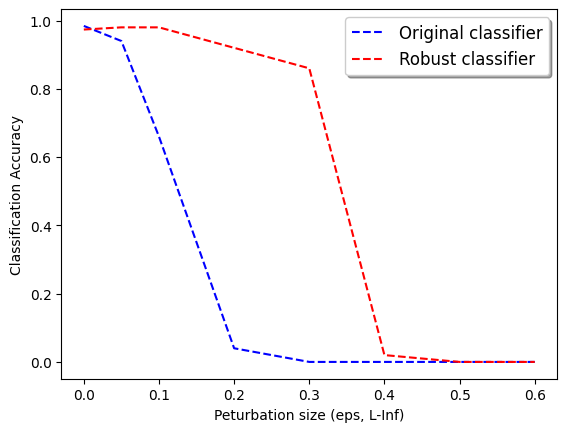

In [47]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range), np.array(nb_correct_original), 'b--', label='Original classifier')
ax.plot(np.array(eps_range), np.array(nb_correct_robust), 'r--', label='Robust classifier')

legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

plt.xlabel('Peturbation size (eps, L-Inf)')
plt.ylabel('Classification Accuracy')
plt.show()

In [ ]:
#8/ What happens when we reduce the number of max_iter to 10 ? Which model becomes better?


1. From max_iter = 100 to max_iter = 10, we notice that accuracies go up for both models (Original and robust). Because reducing max_iter to 10, makes the attack weak, which means it takes too few steps, so it can’t fully exploit the perturbation budget (eps).
2. The robust classifier (red) got better accuracy clearly above the original (blue), in both cases (max_iter=100 and max_iter=10)